Shall we plot the linear or non-linear heat flux parameterization? Type linear or non-linear: non-linear
Shall we plot the tropical equilibrium surface or polar? Type polar or tropic: polar


<IPython.core.display.Javascript object>


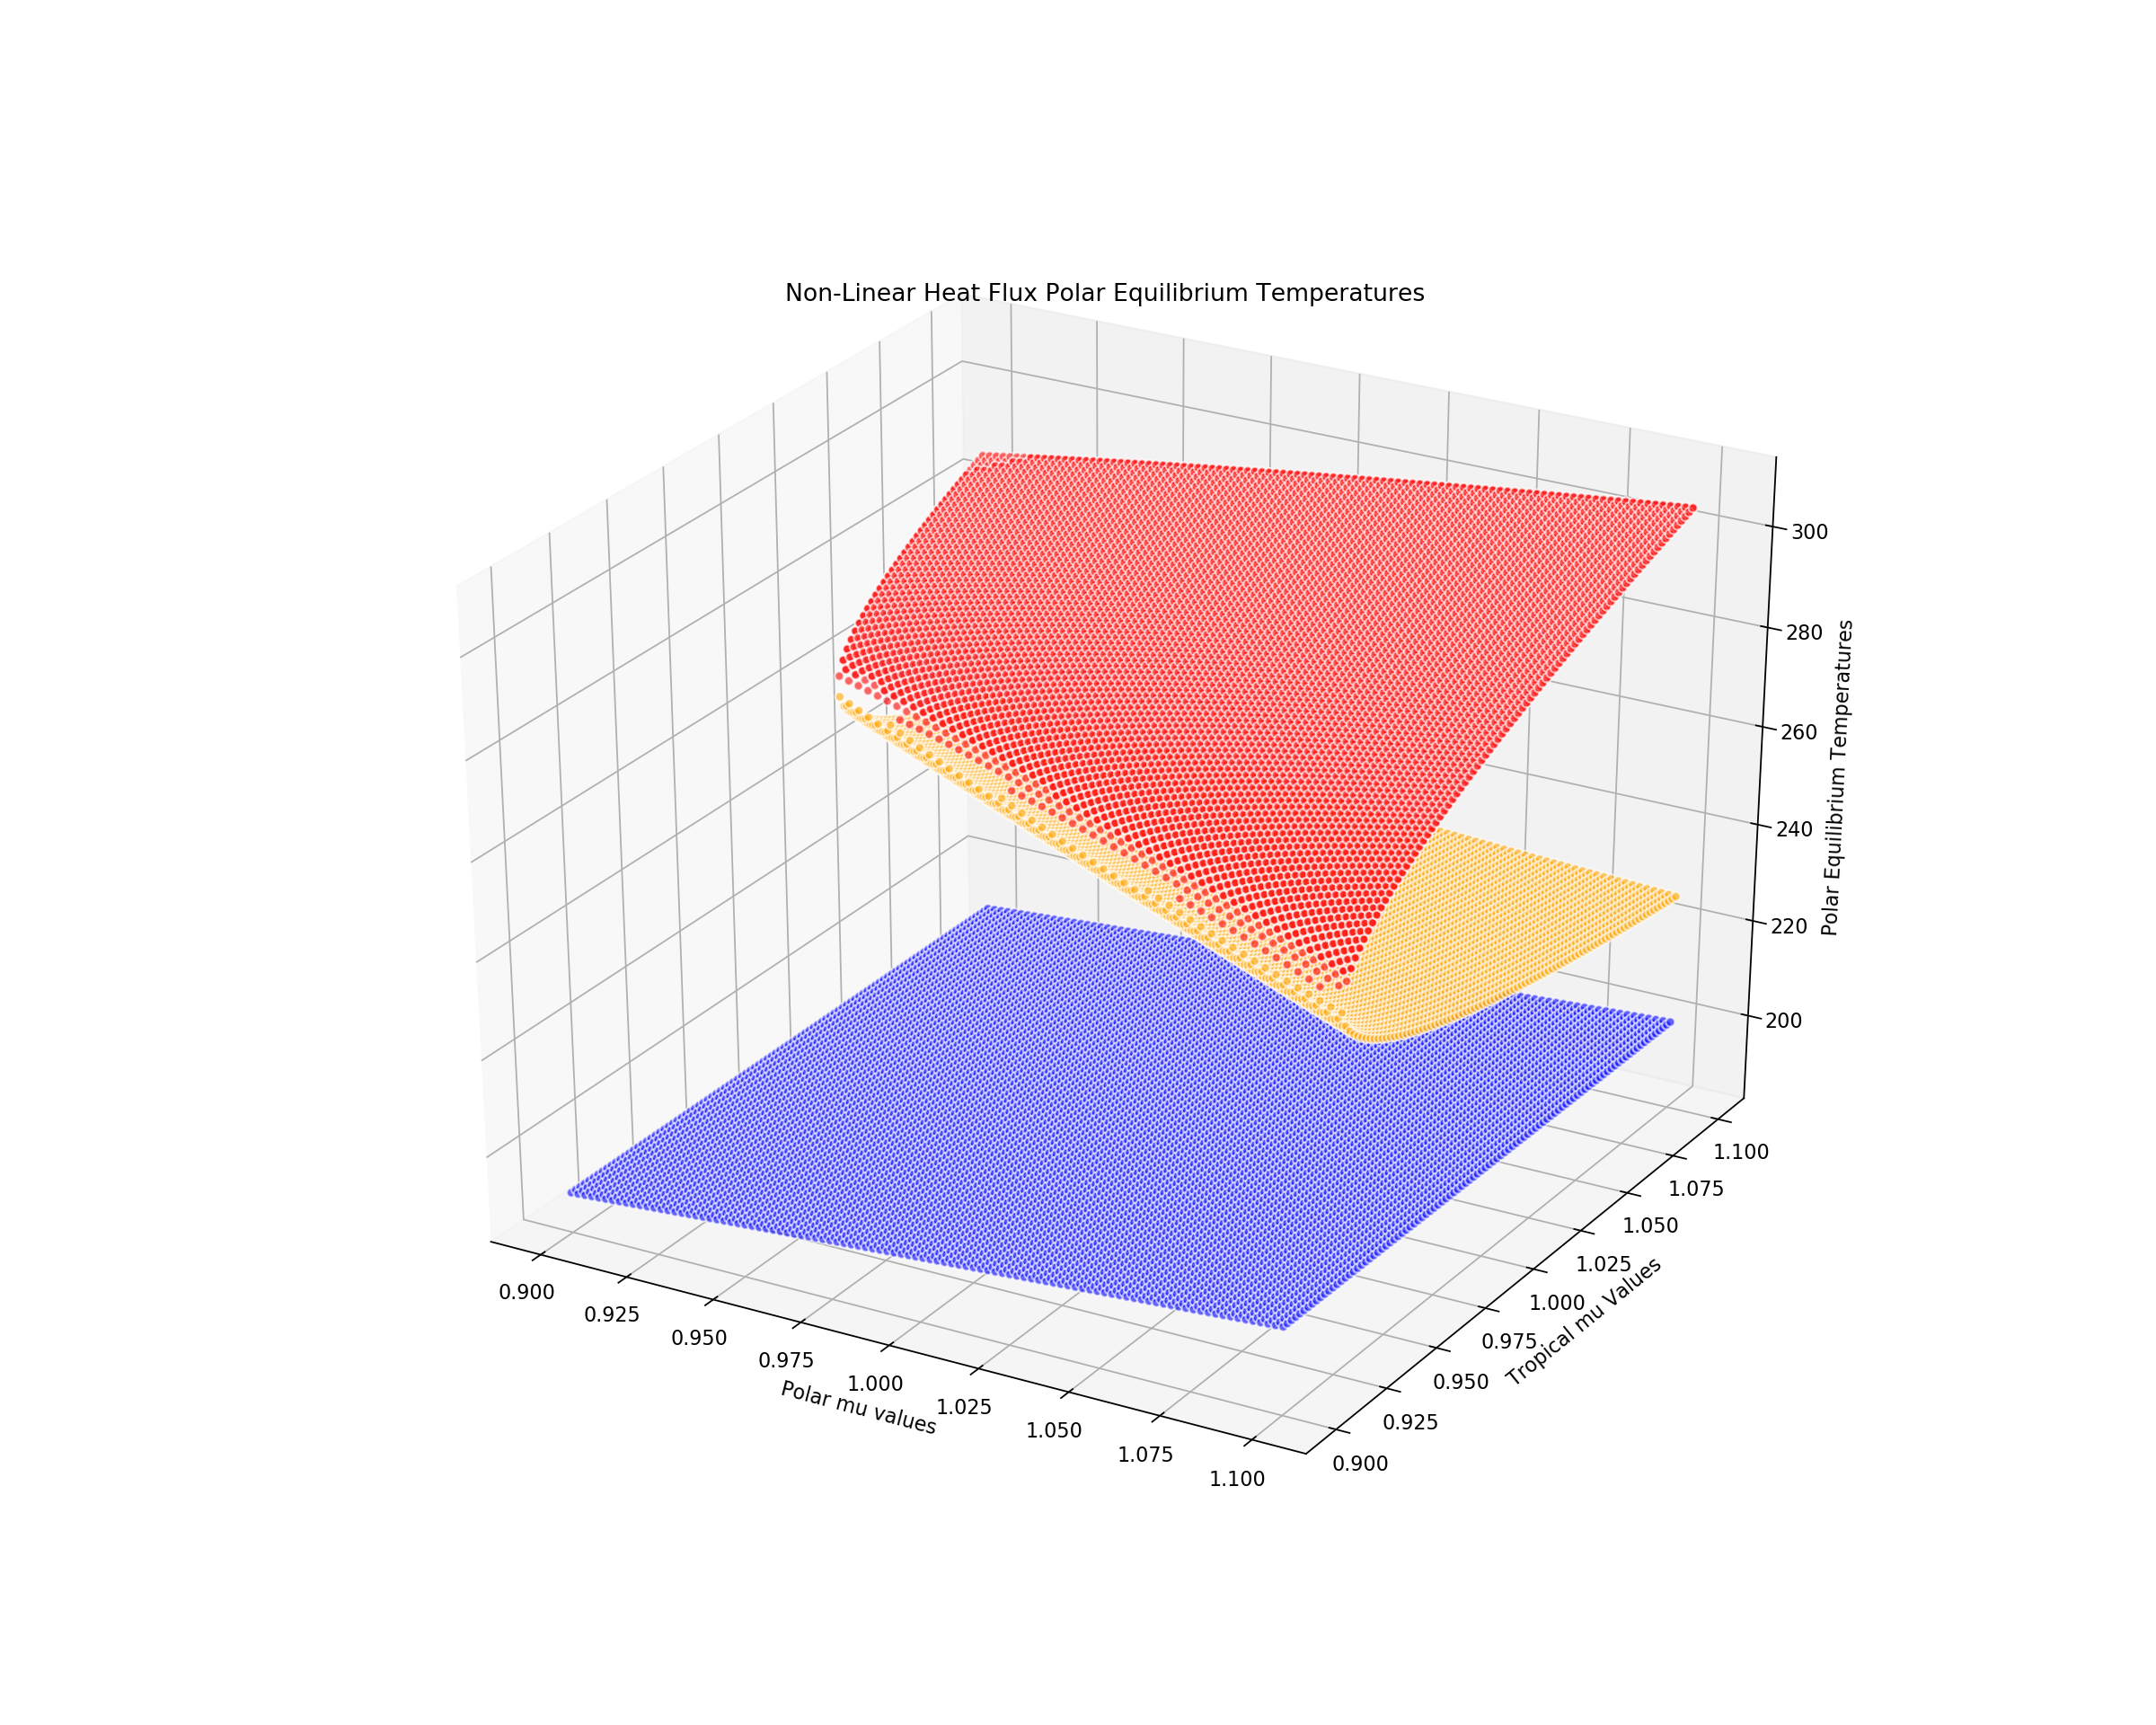

In [9]:
"""Welcome to the two box climate scheme. This code tests parameterizations of the meridional heat flux between the 
two box system. In this scheme we have two boxes, a polar and a tropical one. To see the mathematical modeling of 
each of the boxes, look at the two_box_climate_utils script. This code will allow you to plot the two box climate 
in a 3d space consisting of the solar intensity for each of the boxes and the equilibrium temperatures found by the
coupled autonomous equations representing climate."""


#BEGIN CODE


import nbimporter
import numpy as np
import two_box_climate_utils
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook 

if __name__ == '__main__':
        
    mu1 = np.linspace(.9,1.1,100) #Variations of the solar constant paramter for polar zone
    mu2 = np.linspace(.9,1.1,100) #Variations for the tropic solar constant
    
    #First we must create the linear albedo feedback solutions for both the polar and tropical zones respectively.
    deepfreeze_solns = two_box_climate_utils.linear_albedo_solver(mu1, mu2, 250, 255)
    deepfreeze_solns = deepfreeze_solns.astype(float)
    
    
    #Begining of User Input. User will specifiy whether to plot the linear or non-linear heat flux:
    lin_or_nonlin = str(input("Shall we plot the linear or non-linear heat flux parameterization? Type linear or non-linear: " ))
    
    
    if lin_or_nonlin == 'non-linear':
        
        #Looking for the lower branch solution that comes from the bifurcation line.
        solutions_100 = two_box_climate_utils.nonlinear_equilibrium(mu1, mu2, (150+1j), (155+1j))
        solutions_100 = np.array(solutions_100)
        solutions_100 = solutions_100.astype(float)
        #Now finding the upper branch comming out of bifucation line
        solutions_350 = two_box_climate_utils.nonlinear_equilibrium(mu1, mu2, (350+1j), (355+1j))
        solutions_350 = np.array(solutions_350)
        solutions_350 = solutions_350.astype(float)
        #The non-linear upper branch solution is most complete with two solution sets with different guess values.
        solutions_500 = two_box_climate_utils.nonlinear_equilibrium(mu1, mu2, (500+1j), (505+1j))
        solutions_500 = np.array(solutions_500)
        solutions_500 = solutions_500.astype(float)

        polar_tropic_input = str(input('Shall we plot the tropical equilibrium surface or polar? Type polar or tropic: '))
        
        if polar_tropic_input == 'polar':
            
            fig = plt.figure(figsize=(15, 12))
            ax = fig.add_subplot(111, projection='3d')            
            
            s = solutions_100[:,2]
            ys = solutions_100[:,3]
            zs = solutions_100[:,0]
            ax.scatter(xs, ys, zs, c='orange', alpha=0.6, edgecolors='w')
            xs = solutions_350[:,2]
            ys = solutions_350[:,3]
            zs = solutions_350[:,0]
            ax.scatter(xs, ys, zs, c='red', alpha=0.6, edgecolors='w')
            xs = solutions_500[:,2]
            ys = solutions_500[:,3]
            zs = solutions_500[:,0]
            ax.scatter(xs, ys, zs, c='red', alpha=0.6, edgecolors='w')
            xs = deepfreeze_solns[:,2]
            ys = deepfreeze_solns[:,3]
            zs = deepfreeze_solns[:,0]
            ax.scatter(xs, ys, zs, c='blue', alpha=0.6, edgecolors='w')

            ax.set_xlabel('Polar mu values')
            ax.set_ylabel('Tropical mu Values')
            ax.set_zlabel('Polar Equilibrium Temperatures')
            plt.title('Non-Linear Heat Flux Polar Equilibrium Temperatures')

        elif polar_tropic_input == 'tropic':
            
            fig = plt.figure(figsize=(15, 12))
            ax = fig.add_subplot(111, projection='3d')            
            
            xs = solutions_100[:,2]
            ys = solutions_100[:,3]
            zs = solutions_100[:,1]
            ax.scatter(xs, ys, zs, c='orange', alpha=0.6, edgecolors='w')
            xs = solutions_350[:,2]
            ys = solutions_350[:,3]
            zs = solutions_350[:,1]
            ax.scatter(xs, ys, zs, c='red', alpha=0.6, edgecolors='w')
            xs = solutions_500[:,2]
            ys = solutions_500[:,3]
            zs = solutions_500[:,1]
            ax.scatter(xs, ys, zs, c='red', alpha=0.6, edgecolors='w')
            xs = deepfreeze_solns[:,2]
            ys = deepfreeze_solns[:,3]
            zs = deepfreeze_solns[:,1]
            ax.scatter(xs, ys, zs, c='blue', alpha=0.6, edgecolors='w')

            ax.set_xlabel('Polar mu values')
            ax.set_ylabel('Tropical mu Values')
            ax.set_zlabel('Tropical Equilibrium Temperatures')
            plt.title('Non-Linear Heat Flux Tropical Equilibrium Temperatures')

        else:
            print('That was not a valid input')

    elif lin_or_nonlin == 'linear':
        #Looking for the lower branch solution that comes from the bifurcation line.
        solutions_100 = two_box_climate_utils.linear_equilibrium(mu1, mu2, (150+1j), (155+1j))
        solutions_100 = np.array(solutions_100)
        solutions_100 = solutions_100.astype(float)
        #Now finding the upper branch comming out of bifucation line.
        solutions_350 = two_box_climate_utils.linear_equilibrium(mu1, mu2, (350+1j), (355+1j))
        solutions_350 = np.array(solutions_350)
        solutions_350 = solutions_350.astype(float)
        polar_tropic_input = input("Shall we plot the tropical equilibrium surface or polar? Type polar or tropic: ")


        if polar_tropic_input == 'polar':
            
            fig = plt.figure(figsize=(15, 12))
            ax = fig.add_subplot(111, projection='3d')            
            
            xs = solutions_100[:,2]
            ys = solutions_100[:,3]
            zs = solutions_100[:,0]
            ax.scatter(xs, ys, zs, c='orange', alpha=0.6, edgecolors='w')
            xs = solutions_350[:,2]
            ys = solutions_350[:,3]
            zs = solutions_350[:,0]
            ax.scatter(xs, ys, zs, c='red', alpha=0.6, edgecolors='w')
            xs = deepfreeze_solns[:,2]
            ys = deepfreeze_solns[:,3]
            zs = deepfreeze_solns[:,0]
            ax.scatter(xs, ys, zs, c='blue',alpha=0.6, edgecolors='w')

            ax.set_xlabel('Polar mu values')
            ax.set_ylabel('Tropical mu Values')
            ax.set_zlabel('Polar Equilibrium Temperatures')
            plt.title('Linear Heat Flux Polar Equilibrium Temperatures')

        elif polar_tropic_input == 'tropic':
            
            fig = plt.figure(figsize=(15, 12))
            ax = fig.add_subplot(111, projection='3d')            
            
            xs = solutions_100[:,2]
            ys = solutions_100[:,3]
            zs = solutions_100[:,1]
            ax.scatter(xs, ys, zs, c='orange', alpha=0.6, edgecolors='w')
            xs = solutions_350[:,2]
            ys = solutions_350[:,3]
            zs = solutions_350[:,1]
            ax.scatter(xs, ys, zs, c='red', alpha=0.6, edgecolors='w')
            xs = deepfreeze_solns[:,2]
            ys = deepfreeze_solns[:,3]
            zs = deepfreeze_solns[:,1]
            ax.scatter(xs, ys, zs, c='blue', alpha=0.6, edgecolors='w')

            ax.set_xlabel('Polar mu values')
            ax.set_ylabel('Tropical mu Values')
            ax.set_zlabel('Polar Equilibrium Temperatures')
            plt.title('Linear Heat Flux Tropical Equilibrium Temperatures')
            
        else:
            print('That was not a valid input')
